Analizar y comprender, utilizando la estadistica descriptiva los datos de la fifa y de la prueba (datos del empleo dentro del Ecuador), además de implementar graficos que corroboren los resultado encontrados.

Finalmente, agregar concluciones y recomedaciones al trabajo.

In [114]:
import pandas as pd
import seaborn as sns

In [115]:
def variables_mas_menos_correlacionadas(data, id, masMenos, cantidad):
    if masMenos=="mas":
        aux=data.corr()
        mayorMenor = aux[id].sort_values(ascending  
                                    = False) 
        return mayorMenor[:cantidad]
    else:
        aux=data.corr()
        menorMayor = aux[id].sort_values(ascending  
                                    = True) 
        return menorMayor[:cantidad] 

## Descripcion del dataset: Fifa

In [116]:
datosFifa = pd.read_csv('Recursos/fifa_datos.csv',',')
datosFifa.head()

/home/charly/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Describir el tipo de datos con el que trabaja cada columna en el data set

In [117]:
datosFifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

#### Descripcion de los datos numericos del dataset

In [118]:
datosFifa.describe(include=['int64','float64'])

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


#### Mapa de calor del dataset: este nos sirve para encontrar el nivel de correlacion entre las columnas del data set

<AxesSubplot:>

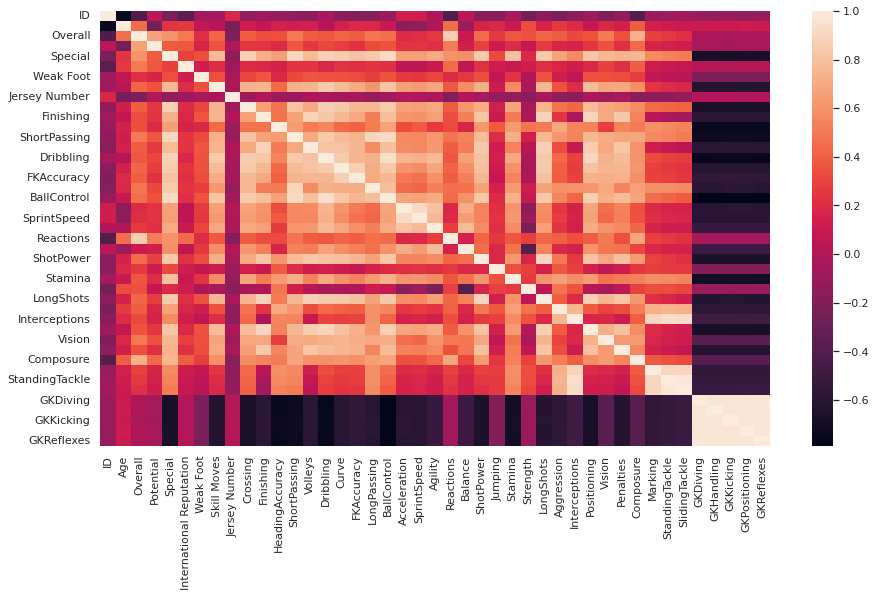

In [119]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(datosFifa.corr())

### Top 10 variables mas correlacionadas con el Overall

In [125]:
variables_mas_menos_correlacionadas(datosFifa, 'Overall', 'mas', 10)

Overall                     1.000000
Reactions                   0.850045
Composure                   0.727655
Potential                   0.660939
Special                     0.606960
ShortPassing                0.502550
International Reputation    0.499491
Vision                      0.498894
LongPassing                 0.483909
BallControl                 0.460197
Name: Overall, dtype: float64

### Top 10 variables menos correlacionadas con el Overall

In [126]:
variables_mas_menos_correlacionadas(datosFifa, 'Overall', 'menos', 10)

ID              -0.417025
Jersey Number   -0.218931
GKKicking       -0.029372
GKDiving        -0.025937
GKHandling      -0.025062
GKReflexes      -0.023276
GKPositioning   -0.017674
Balance          0.103160
Acceleration     0.196869
SprintSpeed      0.210647
Name: Overall, dtype: float64

## Descripcion del dataset: datos del empleo dentro del Ecuador

In [121]:
datosEmpleo = pd.read_csv('Recursos/Conformación de los Grupos Económicos y su Comportamiento Tributario.csv')
datosEmpleo.head()

,Ranking (1) Tamaño 2021,Ranking (1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO GE,Nombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS (*),No. de Integrantes domiciliados en PARAÍSOS FISCALES (**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas Naturales (a),Personas Extranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo (6) 2020,Total Activo (6) 2019,Total Patrimonio (7) 2020,Total Patrimonio (7) 2019,Total Recaudado (8) 2020,Total Recaudado (8) 2019,Total Deuda Generada (9)
0,1,1,0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2,0,3,1,...,221893.35,3509949,3577970,18949015666,17928760492,3688293052,3699748891,588975950,667872172,NaN
1,2,2,0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45,42,17,19,...,4339679.14,796827,945874,6417335168,6436090837,1878733441,1955377497,127087663,190328750,NaN
2,3,3,0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4,5,20,3,...,1617777.87,0,0,3448646302,3343835273,2427005282,2314556018,144524011,139310219,NaN
3,4,5,1,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2,0,9,0,...,86918.43,4785739,5678838,6014463154,5334073117,784042300,791999072,206200661,234359513,NaN
4,5,4,-1,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8,0,0,0,...,237591.28,0,0,3286786210,3616608480,2426480097,2305837270,202204211,152342627,NaN


#### Describir el tipo de datos con el que trabaja cada columna en el data set

In [122]:
datosEmpleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 40 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Ranking (1) Tamaño  2021                                                                                      302 non-null    int64  
 1   Ranking (1) Tamaño  2020                                                                                      302 non-null    int64  
 2   Variación Ranking Tamaño 2020 - 2021                                                                          302 non-null    int64  
 3   NUEVO GE                                                                                                      49 non-null     object 
 4   Nombre Grupo Económico                                  

#### Descripcion de los datos numericos del dataset

In [123]:
datosEmpleo.describe(include=['int64','float64'])

,Ranking (1) Tamaño 2021,Ranking (1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,No. de Integrantes domiciliados en PARAÍSOS FISCALES (**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas Naturales (a),Personas Extranjeras (b),Sociedades Nacionales (c),Sociedades Extranjeras (d),Contribuyentes Especiales,...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo (6) 2020,Total Activo (6) 2019,Total Patrimonio (7) 2020,Total Patrimonio (7) 2019,Total Recaudado (8) 2020,Total Recaudado (8) 2019,Total Deuda Generada (9)
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,0.0
mean,151.500000,151.500000,0.000000,1.506623,1.311258,3.546358,1.112583,19.837748,5.549669,3.705298,...,2.044879e+05,7.585266e+04,7.262930e+04,4.347356e+08,4.258298e+08,1.576028e+08,1.542798e+08,1.827717e+07,2.027815e+07,NaN
std,87.324109,87.324109,14.639182,4.200730,4.555578,4.225713,2.945898,26.866660,11.436486,5.121375,...,5.204052e+05,6.660274e+05,5.962780e+05,1.324460e+09,1.261576e+09,3.428475e+08,3.389915e+08,5.312978e+07,5.759129e+07,NaN
min,1.000000,1.000000,-85.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,5.258247e+06,5.761201e+06,-2.462531e+07,-5.790622e+06,2.530000e+02,2.630000e+02,NaN
25%,76.250000,76.250000,-5.750000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,...,4.771925e+02,0.000000e+00,0.000000e+00,6.270757e+07,6.581446e+07,2.516836e+07,2.355762e+07,1.697240e+06,2.067543e+06,NaN
50%,151.500000,151.500000,1.000000,0.000000,0.000000,2.000000,0.000000,12.500000,2.000000,2.000000,...,1.636740e+04,0.000000e+00,0.000000e+00,1.366815e+08,1.439221e+08,5.478062e+07,5.337896e+07,5.080476e+06,6.081486e+06,NaN
75%,226.750000,226.750000,7.750000,1.000000,0.000000,5.000000,1.000000,23.750000,6.000000,4.000000,...,1.116971e+05,0.000000e+00,0.000000e+00,3.528579e+08,3.479469e+08,1.504091e+08,1.485321e+08,1.125920e+07,1.471770e+07,NaN
max,302.000000,302.000000,49.000000,45.000000,42.000000,23.000000,28.000000,328.000000,129.000000,71.000000,...,4.339679e+06,9.817255e+06,7.702248e+06,1.894902e+10,1.792876e+10,3.688293e+09,3.699749e+09,5.889760e+08,6.678722e+08,NaN


#### Mapa de calor del dataset: este nos sirve para encontrar el nivel de correlacion entre las columnas del data set

<AxesSubplot:>

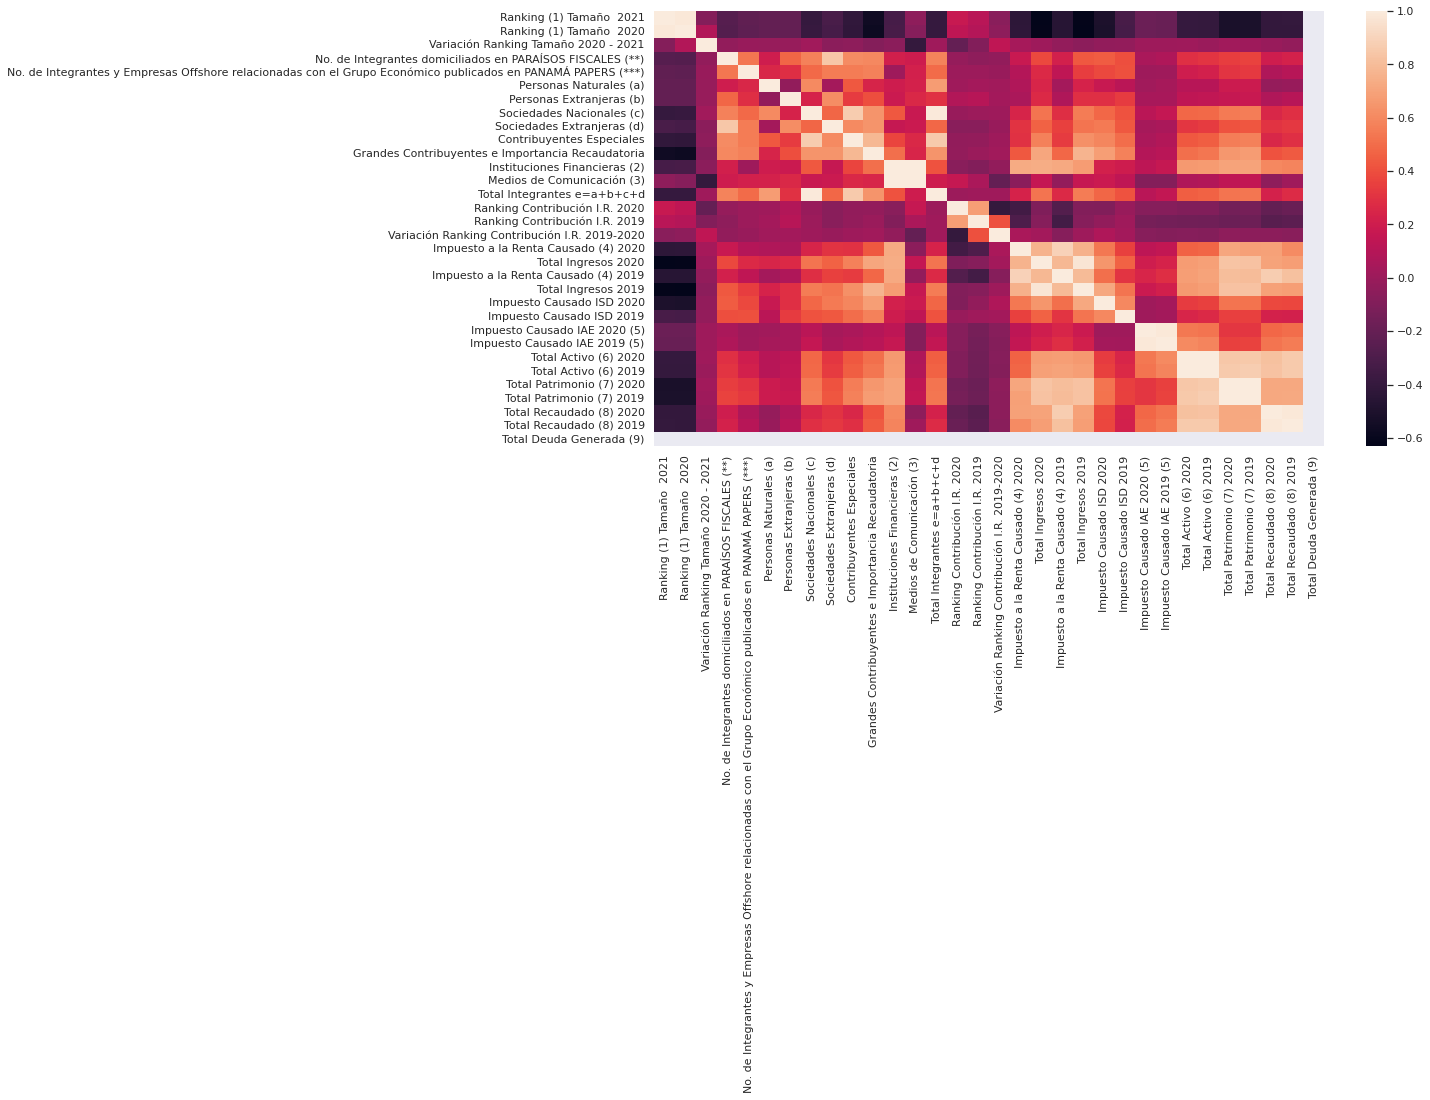

In [124]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(datosEmpleo.corr())

### Top 10 variables mas correlacionadas con el Total Activo (6) 2020

In [129]:
variables_mas_menos_correlacionadas(datosEmpleo, 'Total Activo (6) 2020', 'mas', 10)

Total Activo (6) 2020                   1.000000
Total Activo (6) 2019                   0.998657
Total Recaudado (8) 2019                0.857549
Total Patrimonio (7) 2019               0.852986
Total Patrimonio (7) 2020               0.842773
Total Recaudado (8) 2020                0.821716
Impuesto a la Renta Causado (4) 2019    0.681433
Total Ingresos 2020                     0.672157
Instituciones Financieras (2)           0.661908
Total Ingresos 2019                     0.661723
Name: Total Activo (6) 2020, dtype: float64

### Top 10 variables menos correlacionadas con el Total Activo (6) 2020

In [130]:
variables_mas_menos_correlacionadas(datosEmpleo, 'Total Activo (6) 2020', 'menos', 10)

Ranking (1) Tamaño  2021                                                                                       -0.399537
Ranking (1) Tamaño  2020                                                                                       -0.397270
Ranking Contribución I.R. 2019                                                                                 -0.158194
Ranking Contribución I.R. 2020                                                                                 -0.096709
Variación Ranking Contribución I.R. 2019-2020                                                                  -0.079487
Variación Ranking Tamaño 2020 - 2021                                                                            0.013523
Medios de Comunicación (3)                                                                                      0.072456
Personas Naturales (a)                                                                                          0.104507
Personas Extranjeras (b)        

#### Conclusiones y recomendaciones

* Gracias a los metodos proporcionados por pandas pudimos realizar un analisis descriptivo de todo el dataFrame ya que con tan solo unos simples comandos podemos tomar las columnas o tipos de datos de interes para su respectivo analisis ahorrandonos asi tiempo desarrollo y analisis.
* En el caso del data set de Fifa se identificaron las 10 variables mas ccorrelacionadas con el 'Overall' dentro deel las cuales podemos destacar a:             
    1. Reactions                   0.850045
    2. Composure                   0.727655
    3. Potential                   0.660939
    4. Special                     0.606960
    5. ShortPassing                0.502550

dandonos a entender  que la habilidad esta directamente relacionada con la reaccion, calma, potencial, speacial, y pases cortos

* En el caso del data set de los datos del empleo dentro del Ecuador se identificaron las 10 variables mas ccorrelacionadas con el 'Total Activo (6) 2020', 'menos' dentro deel las cuales podemos destacar a:
    1. Total Activo (6) 2019                   0.998657
    2. Total Recaudado (8) 2019                0.857549
    3. Total Patrimonio (7) 2019               0.852986
    4. Total Patrimonio (7) 2020               0.842773
    5. Total Recaudado (8) 2020                0.821716
    
dandoonos a entender que el total de los activos en el 2020 esta directamente relacionado con el total de activos en el 2019, el total recaaudado en el 2019, total del patrimonio del 2020, total recaudado del 2020.

